# Assessing suitability of a location for thermal property glass

## Introduction

## Import needed tools

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt

## Read in the weather station data

### Create variables to make it easier to choose the country and region of interest

In [7]:
df = pd.read_json("https://bulk.meteostat.net/v2/stations/lite.json.gz")

In [8]:
country = df['country'].unique()
print(f"The countries within the file are: {country}")


The countries within the file are: ['CA' 'NO' 'SE' 'FI' 'DE' 'GB' 'IE' 'IS' 'GL' 'US' 'DK' 'NL' 'BE' 'LU'
 'CH' 'CN' 'LI' 'FR' 'PT' 'ES' 'GI' 'CV' 'AT' 'CZ' 'SK' 'PL' 'HU' 'RS'
 'SI' 'HR' 'BA' 'CS' 'MK' 'AL' 'RO' 'BG' 'IT' 'MT' 'GR' 'TR' 'CY' 'RU'
 'EE' 'LV' 'LT' 'BY' 'KZ' 'UA' 'MD' 'KG' 'GE' 'AZ' 'AM' 'UZ' 'TM' 'TJ'
 'SY' 'LB' 'IL' 'JO' 'SA' 'KW' 'IQ' 'IR' 'AF' 'BH' 'QA' 'AE' 'OM' 'YE'
 'PK' 'BD' 'IN' 'LK' 'MV' 'MN' 'NP' 'HK' 'MO' 'TW' 'KP' 'KR' 'JP' 'MM'
 'TH' 'MY' 'SG' 'VN' 'LA' 'KH' 'MA' 'EH' 'DZ' 'TN' 'NE' 'ML' 'MR' 'SN'
 'GM' 'GW' 'GN' 'SL' 'SH' 'ST' 'IO' 'RE' 'MU' 'TF' 'LY' 'EG' 'SD' 'ER'
 'ET' 'DJ' 'SO' 'UG' 'KE' 'TZ' 'SC' 'CD' 'RW' 'BI' 'CG' 'GA' 'CF' 'TD'
 'GQ' 'CM' 'NG' 'BJ' 'TG' 'GH' 'BF' 'CI' 'LR' 'AO' 'KM' 'MG' 'MZ' 'ZM'
 'MW' 'ZW' 'NA' 'BW' 'ZA' 'SZ' 'LS' 'BV' 'CO' 'PM' 'MX' 'BM' 'BS' 'TC'
 'CU' 'KY' 'JM' 'HT' 'DO' 'HN' 'PR' 'VI' 'VG' 'BZ' 'GT' 'SV' 'NI' 'CR'
 'PA' 'KN' 'AG' 'AN' 'GP' 'DM' 'MQ' 'LC' 'VC' 'BB' 'GD' 'TT' 'AW' 'VE'
 'GY' 'SR' 'GF' 'BR' 'EC' 'PE' 'BO' 'CL' '

In [ ]:
print(df.head(5))

      id                   name country region  \
0  00FAY  {'en': 'Holden Agdm'}      CA     AB   
1  00TG6  {'en': 'Athabasca 1'}      CA     AB   
2  01001    {'en': 'Jan Mayen'}      NO   None   
3  01002     {'en': 'Grahuken'}      NO     SJ   
4  01003     {'en': 'Hornsund'}      NO   None   

                                         identifiers  \
0  {'national': '32395', 'wmo': '71227', 'icao': ...   
1    {'national': '2459', 'wmo': None, 'icao': None}   
2  {'national': None, 'wmo': '01001', 'icao': 'EN...   
3   {'national': None, 'wmo': '01002', 'icao': None}   
4   {'national': None, 'wmo': '01003', 'icao': None}   

                                            location          timezone  \
0  {'latitude': 53.19, 'longitude': -112.25, 'ele...  America/Edmonton   
1  {'latitude': 54.72, 'longitude': -113.29, 'ele...  America/Edmonton   
2  {'latitude': 70.9333, 'longitude': -8.6667, 'e...       Europe/Oslo   
3  {'latitude': 79.7833, 'longitude': 14.4667, 'e...       Europe/

## Prompt user to request the location of interest


In [9]:
# chosencountry = input("Enter the country of interest: ")
chosencountry = "CA"

In [10]:
countrydf = df[df['country'] == chosencountry]

In [ ]:
print(countrydf['region'].unique())
#chosenregion = input("Enter the region of interest: ") 
chosenregion = "ON"

['AB' 'MB' 'SK' 'BC' 'NU' 'YT' 'QC' 'ON' 'NS' 'NL' 'NT' 'PE' 'NB' 'SD'
 'NF']


## Create a new dataframe of the weather stations in the country and region of interest

In [ ]:
areaofinterest = df[df["region"] == chosenregion]
print(areaofinterest.head)

<bound method NDFrame.head of           id                           name country region  \
1211   0CNUO          {'en': 'Rawson Lake'}      CA     ON   
1212   0CO7B       {'en': 'Kingsville Moe'}      CA     ON   
1216   0FV1F     {'en': 'Tillsonburg Wwtp'}      CA     ON   
1217   0FV2W         {'en': 'Mountainview'}      CA     ON   
1549   10RIK       {'en': 'Brockville Pcc'}      CA     ON   
...      ...                            ...     ...    ...   
15791  Y7KHS     {'en': 'Red Lake Airport'}      CA     ON   
15869  ZFS01   {'en': 'Lyndhurst Shawmere'}      CA     ON   
15898  ZSOGU  {'en': 'Pickle Lake Airport'}      CA     ON   
15912  ZWC6W  {'en': 'Kapuskasing Airport'}      CA     ON   
15917  ZYC17     {'en': 'Kingston Airport'}      CA     ON   

                                            identifiers  \
1211    {'national': '3966', 'wmo': None, 'icao': None}   
1212    {'national': '4647', 'wmo': None, 'icao': None}   
1216    {'national': '4699', 'wmo': None, 'icao'

In [ ]:
listofstations = areaofinterest['id'].unique()

## Pass in each weather station ID


### Create the column names


In [11]:
date = "Date"
tavg = "Average air temperature in Celsius"
tmin = "Minimum air temperature in Celsius"
tmax = "Maximum air temperature in Celsius"
#sun = "Daily sunshine in minutes"

## Weather station data for weather station 1211
https://dev.meteostat.net/bulk/daily.html#endpoints

In [ ]:
station1211 = pd.read_csv("https://bulk.meteostat.net/v2/daily/0CNUO.csv.gz", usecols = [0,1, 2, 3], names =[date, tavg, tmin, tmax], parse_dates =['Date'])
station1211["Year"] = station1211["Date"].dt.year
station1211["Month"] = station1211["Date"].dt.month
print(station1211.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8014 entries, 0 to 8013
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Date                                8014 non-null   datetime64[ns]
 1   Average air temperature in Celsius  8010 non-null   float64       
 2   Minimum air temperature in Celsius  8011 non-null   float64       
 3   Maximum air temperature in Celsius  8013 non-null   float64       
 4   year                                8014 non-null   int32         
 5   month                               8014 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(2)
memory usage: 313.2 KB
None


### Average the data by month

In [43]:
import datetime as dt
monthly_avg= station1211.groupby(pd.Grouper(key='Date', axis=0, freq='ME')).mean() 
monthly_avg.reset_index('Date', inplace=True)
print(monthly_avg)


          Date  Average air temperature in Celsius  \
0   2000-01-31                          -15.854839   
1   2000-02-29                           -8.255172   
2   2000-03-31                           -0.751613   
3   2000-04-30                            3.206667   
4   2000-05-31                           11.374194   
..         ...                                 ...   
295 2024-08-31                           19.642308   
296 2024-09-30                           17.703704   
297 2024-10-31                            8.261290   
298 2024-11-30                            0.396667   
299 2024-12-31                           -8.287500   

     Minimum air temperature in Celsius  Maximum air temperature in Celsius  \
0                            -21.080645                          -10.580645   
1                            -14.086207                           -2.396552   
2                             -6.467742                            4.951613   
3                             -2.45

### Plot the data


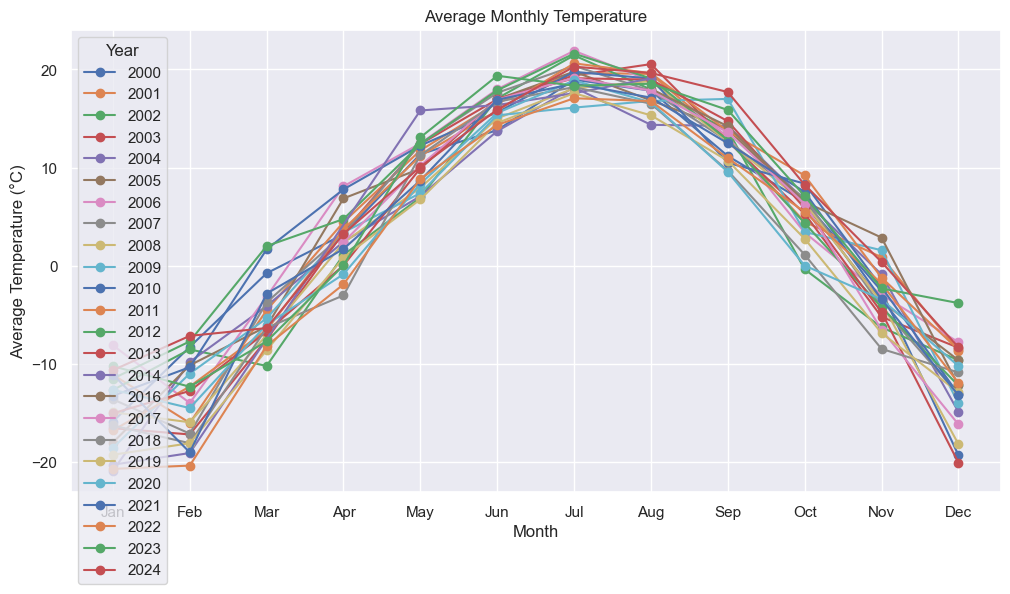

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import gzip
from io import BytesIO

# Step 1: Download and load the data file
url = "https://bulk.meteostat.net/v2/daily/0CNUO.csv.gz"
response = requests.get(url)
response.raise_for_status()  # Ensure the request was successful

# Decompress the gzip file
data = gzip.GzipFile(fileobj=BytesIO(response.content))

# Step 2: Load the first four columns of the CSV into a pandas DataFrame
columns_to_use = ["date", "tavg", "tmin", "tmax"]
df = pd.read_csv(data, usecols=[0,1,2,3], names=columns_to_use, parse_dates=["date"])

# Ensure the "date" column is datetime
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

# Step 3: Group by year and month, then calculate the average temperature for each month
df = df.dropna(subset=["tavg"])  # Remove rows with missing average temperature
monthly_avg = df.groupby(["year", "month"])["tavg"].mean().reset_index()

# Step 4: Plot the data
plt.figure(figsize=(12, 6))
years = monthly_avg["year"].unique()

for year in years:
    year_data = monthly_avg[monthly_avg["year"] == year]
    plt.plot(year_data["month"], year_data["tavg"], marker="o", label=str(year))

plt.title("Average Monthly Temperature")
plt.xlabel("Month")
plt.ylabel("Average Temperature (°C)")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Year", loc="upper left")
plt.grid(True)
plt.show()


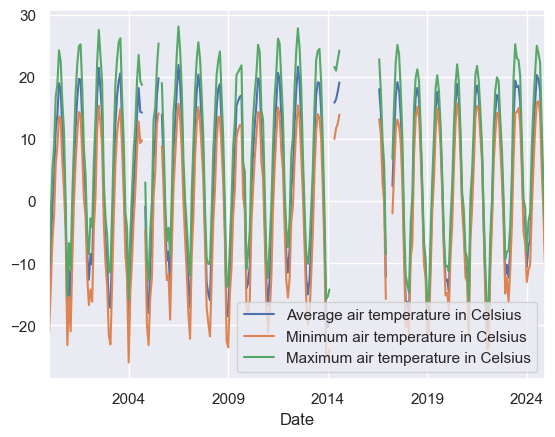

In [19]:
monthly_avg.plot(x='Date', kind='line')
plt.show()


## Regression and Scikit Learn
https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

Root Mean Squared Error: 3.40°C


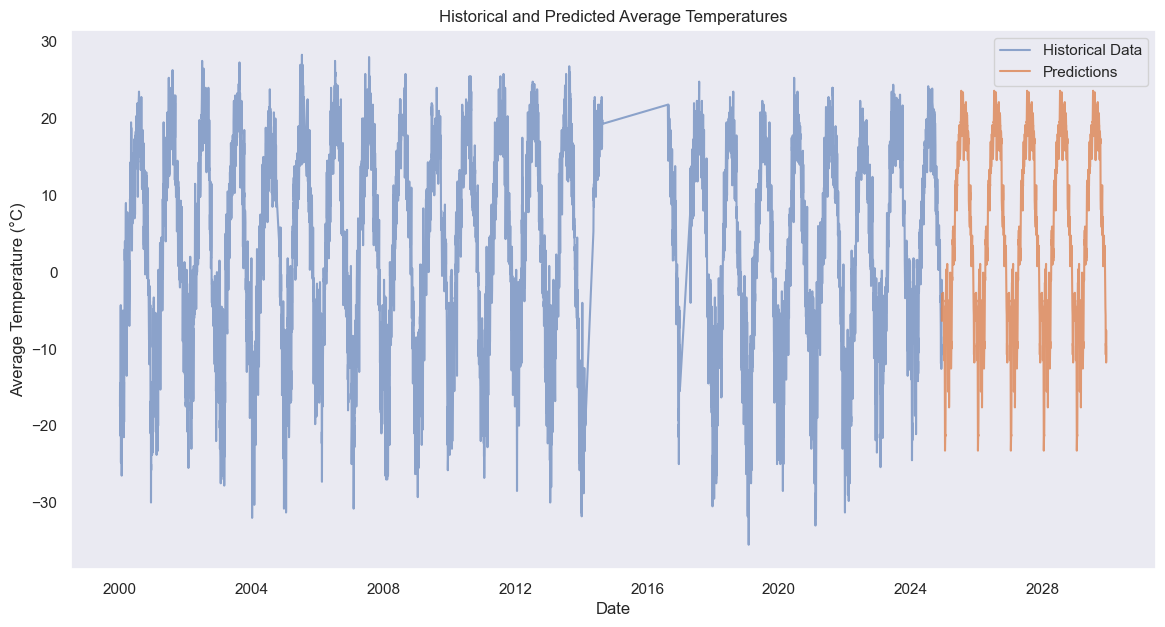

Predictions saved to 'predicted_temperatures.csv'


In [50]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from datetime import timedelta
import matplotlib.pyplot as plt

# Step 1: Load Data
url = "https://bulk.meteostat.net/v2/daily/0CNUO.csv.gz"
df = pd.read_csv(url, compression='gzip', usecols=[0,1,2,3], names =["date", "tavg", "tmin", "tmax"])

# Step 2: Select Relevant Columns
df.dropna(inplace=True)

# Step 3: Prepare Features
df['date'] = pd.to_datetime(df['date'])
df['day_of_year'] = df['date'].dt.dayofyear
df['year'] = df['date'].dt.year

# Features: Day of the year and year; Target: Average temperature
X = df[['day_of_year', 'year']]
y = df['tavg']

# Step 4: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Model
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Step 6: Evaluate Model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:.2f}°C")

# Step 7: Predict for Next 5 Years
future_years = pd.date_range(start=df['date'].max() + timedelta(days=1), 
                             periods=5 * 365, freq='D')
future_df = pd.DataFrame({
    'date': future_years,
    'day_of_year': future_years.day_of_year,
    'year': future_years.year
})
future_predictions = model.predict(future_df[['day_of_year', 'year']])
future_df['predicted_tavg'] = future_predictions

# Step 8: Plot Known Data and Predictions
plt.figure(figsize=(14, 7))

# Plot historical data
plt.plot(df['date'], df['tavg'], label='Historical Data', alpha=0.6)

# Plot predictions
plt.plot(future_df['date'], future_df['predicted_tavg'], label='Predictions', alpha=0.8)

plt.title('Historical and Predicted Average Temperatures')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid()
plt.show()

# Step 9: Save Predictions
future_df.to_csv('predicted_temperatures.csv', index=False)
print(f"Predictions saved to 'predicted_temperatures.csv'")

# Sci Kit Learn
https://www.askpython.com/python/examples/weather-data-clustering

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates

%matplotlib inline


## Load the dataset

In [ ]:
date = "Date"
tavg = "Average air temperature in Celsius"
tmin = "Minimum air temperature in Celsius"
tmax = "Maximum air temperature in Celsius"

station1211 = pd.read_csv("https://bulk.meteostat.net/v2/daily/0CNUO.csv.gz", usecols = [0,1,2,3], names =[date, tavg, tmin, tmax],parse_dates=[0])
#station1211["id"] = df.index + 1
print(station1211.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8014 entries, 0 to 8013
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Date                                8014 non-null   datetime64[ns]
 1   Average air temperature in Celsius  8010 non-null   float64       
 2   Minimum air temperature in Celsius  8011 non-null   float64       
 3   Maximum air temperature in Celsius  8013 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 250.6 KB
None


## Sample the data

In [ ]:
sampled_df = station1211[(station1211['Date'] % 2) == 0]
sampled_df.shape

#sampled_df.set_index('Date', inplace=True)

# del sampled_df['Average air temperature in Celsius']
# del sampled_df['Maximum air temperature in Celsius']
 


TypeError: cannot perform __mod__ with this index type: DatetimeArray

In [ ]:
B = sampled_df.shape[0]
sampled_df = sampled_df.dropna()
A = sampled_df.shape[0]
 
print("No of rows deleted: ", B-A)

In [ ]:
# Required Libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from datetime import datetime

# Step 1: Load Data
url = "https://bulk.meteostat.net/v2/daily/0CNUO.csv.gz"
df = pd.read_csv(url, compression='gzip', usecols=[0,1,2,3], names =[date, tavg, tmin, tmax])
df.info()

# Step 2: Select First Four Columns
#df = df[0,1,2,3]

# Step 3: Handle Missing Values
df.dropna(inplace=True)

# Step 4: Add Cyclical Features for Date
df['Date'] = pd.to_datetime(df['Date'])
df['day_of_year'] = df['Date'].dt.dayofyear
df['sin_day'] = np.sin(2 * np.pi * df['day_of_year'] / 365.0)
df['cos_day'] = np.cos(2 * np.pi * df['day_of_year'] / 365.0)

# Step 5: Prepare Data for Clustering
features = ['tavg', 'tmin', 'tmax', 'sin_day', 'cos_day']
X = df[features]

# Step 6: Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Step 7: Visualize Clusters
plt.figure(figsize=(10, 6))
for cluster in range(kmeans.n_clusters):
    cluster_data = df[df['cluster'] == cluster]
    plt.scatter(cluster_data['day_of_year'], cluster_data['tavg'], label=f'Cluster {cluster}')
    
plt.title('KMeans Clustering of Weather Data')
plt.xlabel('Day of Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8014 entries, 0 to 8013
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date                                8014 non-null   object 
 1   Average air temperature in Celsius  8010 non-null   float64
 2   Minimum air temperature in Celsius  8011 non-null   float64
 3   Maximum air temperature in Celsius  8013 non-null   float64
dtypes: float64(3), object(1)
memory usage: 250.6+ KB


KeyError: "['tavg', 'tmin', 'tmax'] not in index"